In [ ]:
from venny4py.venny4py import *

In [ ]:
import pandas as pd
import os
from collections import defaultdict
from numpy import nan


df_antidep = pd.read_csv("efficacy_coef.csv")
df_antidep = df_antidep.drop(['Unnamed: 0',],axis=1)
df_antidep = df_antidep.drop(['eff_coef_full'],axis=1)
clin_ridge = "insilico_phagocyt_ridgeregcoeffs.xlsx"
zeb_ridge = "zebrafish_ridgeregcoeffs.xlsx"
df_insilico = pd.read_excel(clin_ridge)
df_zebrafish = pd.read_excel(zeb_ridge)

In [ ]:
df_pathfx = pd.read_excel("../supplemental_files/SF1_SCZ_PSCZ_MDD_RD_UD_BPDv3.xlsx",sheet_name="SummOfMostCommonGenes")

In [ ]:
# Extract genes with unfavorable coefficients from each DataFrame
insilico_terms = set(df_insilico[df_insilico['Regression Coefficients'] > 0]['Gene Names'])
zebrafish_terms = set(df_zebrafish[df_zebrafish['Regression Coefficients'] < 0]['Gene Names'])
clinical_terms = set(df_antidep[df_antidep['eff_coef_ridge'] < 0]['gene'])

In [ ]:
pathfx_allgenes = set(df_pathfx['GeneName'])

In [ ]:
sets = {
    'Insilico': insilico_terms,
    'Clinical': clinical_terms,
    'Zebrafish': zebrafish_terms,
    'PathFX': pathfx_allgenes
}

In [ ]:
shared_all = insilico_terms.intersection(clinical_terms,zebrafish_terms,pathfx_allgenes)
shared_just_screens = insilico_terms.intersection(clinical_terms,zebrafish_terms)

outf = open("shared_all_unfavorable.csv",'w')
n = outf.write('\n'.join(sorted(shared_all)))
outf.close()


outf = open("shared_just_screens_unfavorable.csv",'w')
n = outf.write('\n'.join(sorted(shared_just_screens)))
outf.close()

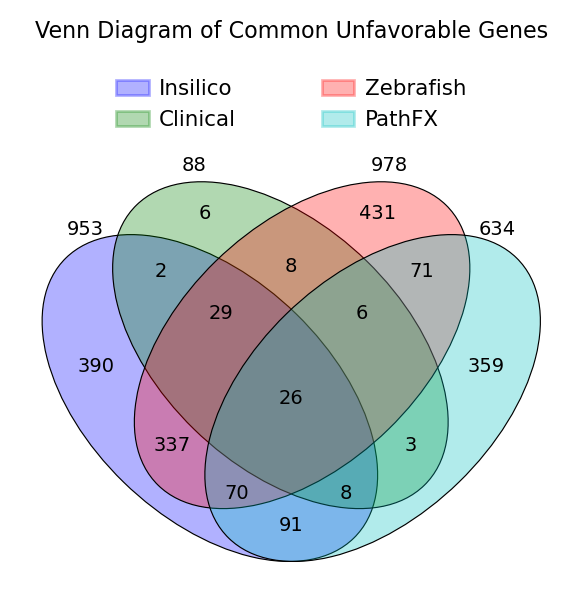

In [ ]:
venny4py(sets=sets)

plt.title('Venn Diagram of Common Unfavorable Genes', fontsize=8)

plt.savefig("figure5a_shared_favorable.png", dpi=300)

plt.show()

In [ ]:
# Extract genes with favorable coefficients from each DataFrame
insilico_terms = set(df_insilico[df_insilico['Regression Coefficients'] < 0]['Gene Names'])
zebrafish_terms = set(df_zebrafish[df_zebrafish['Regression Coefficients'] > 0]['Gene Names'])
clinical_terms = set(df_antidep[df_antidep['eff_coef_ridge'] > 0]['gene'])

In [ ]:
sets = {
    'Insilico': insilico_terms,
    'Clinical': clinical_terms,
    'Zebrafish': zebrafish_terms,
    'PathFX': pathfx_allgenes
}

In [ ]:
shared_all = insilico_terms.intersection(clinical_terms,zebrafish_terms,pathfx_allgenes)
shared_just_screens = insilico_terms.intersection(clinical_terms,zebrafish_terms)

outf = open("shared_all_favorable.csv",'w')
n = outf.write('\n'.join(sorted(shared_all)))
outf.close()


outf = open("shared_just_screens_favorable.csv",'w')
n = outf.write('\n'.join(sorted(shared_just_screens)))
outf.close()

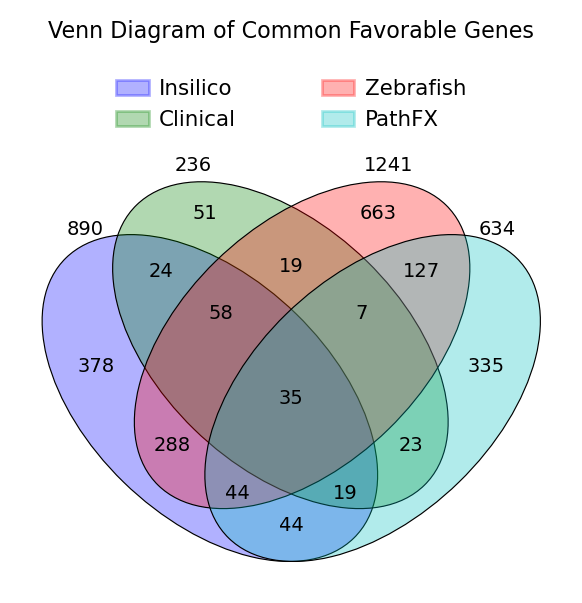

In [ ]:
venny4py(sets=sets)

title = plt.title('Venn Diagram of Common Favorable Genes')
title.set_fontsize(8)  # Explicitly set the title font size

plt.savefig("venn4_favorable.png", dpi=300)

plt.show()